In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('books.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


<h1>Основные данные<h1>

In [12]:
df['Genre'] = np.where(df['Genre'] == 'Fiction', 1, 0)
df['Genre']

0      0
1      1
2      0
3      1
4      0
      ..
545    1
546    0
547    0
548    0
549    0
Name: Genre, Length: 550, dtype: int32

In [265]:
df.shape

(550, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    int32  
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 28.1+ KB


In [14]:
df.describe()

,User Rating,Reviews,Price,Year,Genre
count,550.000000,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000,0.436364
std,0.226980,11731.132017,10.842262,3.165156,0.496385
min,3.300000,37.000000,0.000000,2009.000000,0.000000
25%,4.500000,4058.000000,7.000000,2011.000000,0.000000
50%,4.700000,8580.000000,11.000000,2014.000000,0.000000
75%,4.800000,17253.250000,16.000000,2017.000000,1.000000
max,4.900000,87841.000000,105.000000,2019.000000,1.000000


In [15]:
df.groupby('Year')

In [16]:
df.groupby('Year')['Name'].count()

Year
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
Name: Name, dtype: int64

In [17]:
df.groupby('Year')['Price'].sum()
#общую сумму цен книг для каждого года

Year
2009    770
2010    674
2011    755
2012    765
2013    730
2014    732
2015    521
2016    659
2017    569
2018    526
2019    504
Name: Price, dtype: int64

In [18]:
#средняя оценка пользователей
rating = df.groupby('Year')['User Rating'].mean()
rating

Year
2009    4.584
2010    4.558
2011    4.558
2012    4.532
2013    4.554
2014    4.622
2015    4.648
2016    4.678
2017    4.660
2018    4.668
2019    4.740
Name: User Rating, dtype: float64

In [19]:
df.groupby('Year')['Reviews'].sum()

Year
2009    235506
2010    273981
2011    405041
2012    654546
2013    654907
2014    792997
2015    711669
2016    709800
2017    644420
2018    696521
2019    794917
Name: Reviews, dtype: int64

<h1>ВИЗУАЛИЗАЦИЯ<h1>

<Axes: xlabel='Year'>

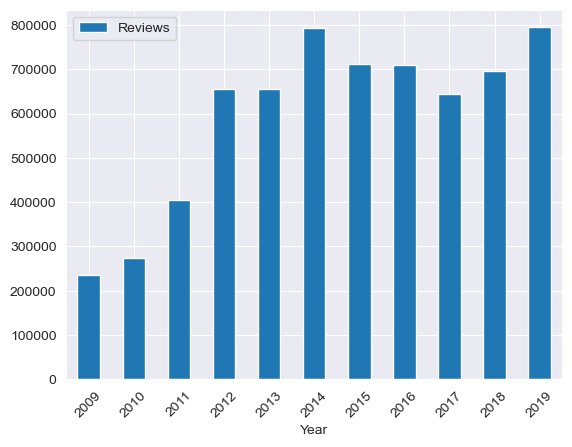

In [20]:
df1 = df[[x for x in df.columns if 'Reviews' in x] + ['Year']]
df1.groupby('Year').sum().plot(kind='bar', rot = 45)
#строит гистограмму (тип диаграммы "bar") по суммированным значениям, при этом метки на оси X поворачиваются на 45 градусов(чтобы они не налезали друг на друга).

In [268]:
df1 = df[[x for x in df.columns if 'User Score' in x] + ['Year']]
df1.groupby('Year').sum().plot(kind='bar', rot = 45)



TypeError: no numeric data to plot

<Axes: xlabel='Year'>

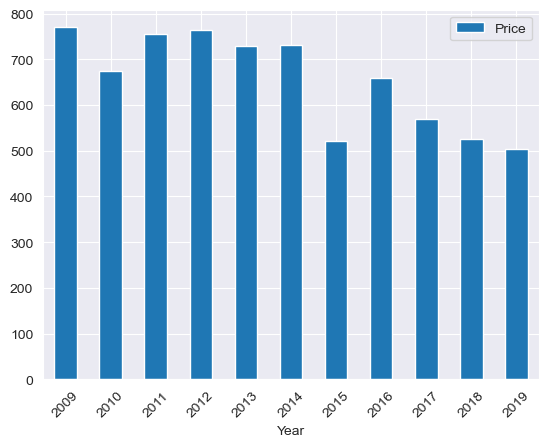

In [43]:
df1 = df[[x for x in df.columns if 'Price' in x] + ['Year']]
df1.groupby('Year').sum().plot(kind='bar', rot = 45)

<Axes: xlabel='Year'>

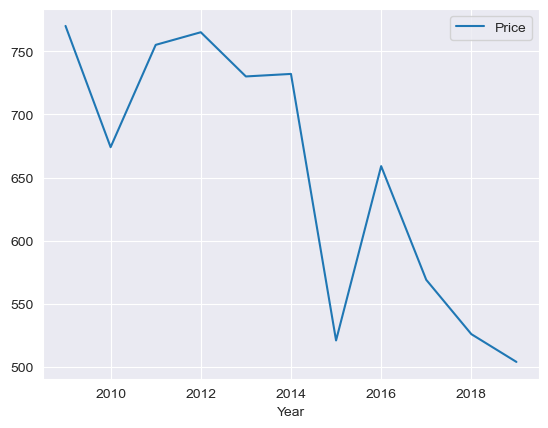

In [44]:
df1.groupby('Year').sum().plot()

In [46]:
# Визуализация данных
import plotly.graph_objects as go

In [310]:
# Группировка данных по авторам и подсчет количества книг
authors_df = df.groupby('Author')[['Name']].count().reset_index()
#.reset_index() - преобразует полученную серию в DataFrame с двумя столбцами.
authors_df.columns = ['Author', 'Number_of_Books']
authors_df = authors_df.sort_values('Number_of_Books', ascending=False)

# по авторам
fig = go.Figure()
fig.add_trace(go.Bar(x=authors_df['Author'], y= authors_df['Number_of_Books'], name='Number of Books'))
fig.update_layout(title='Number of Books by Author', xaxis_title='Author', yaxis_title='Number of Books', xaxis_tickangle=-60)
fig.show()


In [311]:
Jeff = df[df['Author'] == 'Jeff Kinney']['Price'].mean()
Rick = df[df['Author'] == 'Rick Riordan']['Price'].mean()
Tina = df[df['Author'] == 'Tina Fey']['Price'].mean()
Sasha = df[df['Author'] == "Sasha O'Hara"]['Price'].mean()
print("Мало книг у Тины и Сашы \nБольше книг у Джефа и Рика\n")
print("Tina-", Tina,"\nSasha-", Sasha,'\nJeff-', Jeff, '\nRick-', Rick)

Мало книг у Тины и Сашы 
Больше книг у Джефа и Рика

Tina- 12.0 
Sasha- 4.0 
Jeff- 9.25 
Rick- 9.909090909090908


In [312]:
er_df = df.groupby('Author')[['Reviews']].mean().reset_index()
#.reset_index() - преобразует полученную серию в DataFrame с двумя столбцами.
er_df.columns = ['Author', 'Reviews']
er_df = er_df.sort_values('Reviews', ascending=False)

# по авторам
fig = go.Figure()
fig.add_trace(go.Bar(x=er_df['Author'], y= er_df['Reviews'], name='Reviews of Books'))
fig.update_layout(title='Reviews by Author', xaxis_title='Author', yaxis_title='Reviews of Books', xaxis_tickangle=-60)
fig.show()

In [313]:
Suzanne = df[df['Author'] == 'Suzanne Collins']['Price'].mean()
Zhi = df[df['Author'] == 'Zhi Gang Sha']['Price'].mean()

Andy = df[df['Author'] == 'Andy Weir']['Price'].mean() #ближе к максимуму
Allie = df[df['Author'] == "Allie Brosh"]['Price'].mean() #ближе к минимуму

print("Больше всех обзоров у Сюзанны \nМеньше всех у Джи Ганк Ша")
print(f"Сюзанна - {Suzanne}, Джи Ганк Ша - {Zhi}, Энди - {Andy}, Элли - {Allie}")

Больше всех обзоров у Сюзанны 
Меньше всех у Джи Ганк Ша
Сюзанна - 13.363636363636363, Джи Ганк Ша - 11.5, Энди - 9.0, Элли - 17.0


In [314]:
er_df = df.groupby('Author')[['User Rating']].mean().reset_index()
#.reset_index() - преобразует полученную серию в DataFrame с двумя столбцами.
er_df.columns = ['Author', 'User Rating']
er_df = er_df.sort_values('User Rating', ascending=False)

# по авторам
fig = go.Figure()
fig.add_trace(go.Bar(x=er_df['Author'], y= er_df['User Rating'], name='User Rating of Books'))
fig.update_layout(title='User Rating by Author', xaxis_title='Author', yaxis_title='User Rating of Books', xaxis_tickangle=-60)
fig.show()

In [315]:
# Группировка данных по жанрам и подсчет количества книг
genres_df = df.groupby('Genre')[['Name']].count().reset_index()
genres_df.columns = ['Genre', 'Number_of_Books']
genres_df = genres_df.sort_values('Number_of_Books', ascending=False)


# по жанрам
fig = go.Figure()
fig.add_trace(go.Bar(x=genres_df['Genre'], y=genres_df['Number_of_Books'], name='Number of Books'))
fig.update_layout(title='Number of Books by Genre', xaxis_title='Genre', yaxis_title='Number of Books', xaxis_tickangle=-45)
fig.show()

In [316]:
years_df = df.groupby('Year')[['User Rating']].mean().reset_index()
years_df.columns = ['Year', 'Avg_User_Rating']

fig = go.Figure()
fig.add_trace(go.Line(x=years_df['Year'], y=years_df['Avg_User_Rating'], name='Average User Rating'))
fig.update_layout(title='Average User Rating by Year', xaxis_title='Year', yaxis_title='Average User Rating')
fig.show()

D:\anaconda\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [318]:
years_df = df.groupby('Year')[['Reviews']].mean().reset_index()
years_df.columns = ['Year', 'Reviews']

fig = go.Figure()
fig.add_trace(go.Line(x=years_df['Year'], y=years_df['Reviews'], name='Average User Reviews'))
fig.update_layout(title='Average User Reviews by Year', xaxis_title='Year', yaxis_title='Average User Reviews')
fig.show()

D:\anaconda\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [51]:
years_df = df.groupby('Year')[['Price']].sum().reset_index()
years_df.columns = ['Year', 'Price']

fig = go.Figure()
fig.add_trace(go.Line(x=years_df['Year'], y=years_df['Price'], name='Price'))
fig.update_layout(title='Price by Year', xaxis_title='Year', yaxis_title='Price')
fig.show()

D:\anaconda\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [52]:
years_df = df.groupby('Year')[['Reviews']].sum().reset_index()
years_df.columns = ['Year', 'Reviews']

fig = go.Figure()
fig.add_trace(go.Line(x=years_df['Year'], y=years_df['Reviews'], name='Reviews'))
fig.update_layout(title='Reviews by Year', xaxis_title='Year', yaxis_title='Reviews')
fig.show()

D:\anaconda\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [53]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [54]:
data = []
for genre in df['Author'].unique():
    (data.append(
        go.Box(y=df[df['Author'] == genre]['User Rating'], name = genre)
        #возвращает одномерную серию Pandas, содержащую значения 'User Rating' для строк, соответствующих текущему жанру (автору).
    ))
iplot(data, show_link = False)

In [55]:
data = []
for genre in df['Author'].unique():
    data.append(
        go.Box(y=df[df['Author'] == genre]['Price'], name = genre)
    )
iplot(data, show_link = False)

In [56]:
genres_df = df.groupby(['Year','Genre'])

In [57]:
genres_stats = genres_df['User Rating'].agg(['count', 'mean']) #две функции применяются
genres_stats = genres_stats.reset_index()
genres_stats.columns = ['Year', 'Genre', 'Count', 'Avg_User_Rating']
genres_stats

,Year,Genre,Count,Avg_User_Rating
0,2009,0,26,4.576923
1,2009,1,24,4.591667
2,2010,0,30,4.520000
3,2010,1,20,4.615000
4,2011,0,29,4.513793
5,2011,1,21,4.619048
6,2012,0,29,4.558621
7,2012,1,21,4.495238
8,2013,0,26,4.561538
9,2013,1,24,4.545833


In [58]:
import plotly.graph_objects as go

In [59]:
genres_stats['Genre'] = genres_stats['Genre'].astype(str)

unique_genres = genres_stats['Genre'].unique()

fig = go.Figure()

for genre in unique_genres:
    genre_data = genres_stats[genres_stats['Genre'] == genre]
    fig.add_trace(go.Scatter(x=genre_data['Year'], y=genre_data['Avg_User_Rating'], mode='lines', name=genre))


fig.update_layout(
    title='Average User Rating by Year and Genre',
    xaxis_title='Year',
    yaxis_title='Average User Rating',
    legend_title_text='Genre'
)

iplot(fig, show_link=False)


In [63]:
price_df = df.groupby(['Year', 'Price'])
price_stats = genres_df['User Rating'].agg(['count', 'mean'])  #две функции применяются

price_stats = price_stats.reset_index()
price_stats.columns = ['Year', 'Genre', 'Count', 'Avg_User_Rating']
price_stats

,Year,Genre,Count,Avg_User_Rating
0,2009,1,1,4.50
1,2009,2,1,4.40
2,2009,4,2,4.70
3,2009,5,1,4.60
4,2009,6,5,4.60
...,...,...,...,...
237,2019,15,3,4.70
238,2019,16,2,4.55
239,2019,18,2,4.85
240,2019,20,1,4.80


In [66]:
genres_df = df.groupby(['Year', 'Author'])
genres_stats = genres_df['Reviews'].agg(['count', 'mean'])
genres_stats = genres_stats.reset_index()
genres_stats.columns = ['Year', 'Author', 'Count', 'Avg_Reviews']

genres_stats['Author'] = genres_stats['Author'].astype(str)

unique_prices = genres_stats['Author'].unique()

fig = go.Figure()

for price in unique_prices:
    price_data = genres_stats[genres_stats['Author'] == price]
    fig.add_trace(go.Scatter(x=price_data['Year'], y=price_data['Avg_Reviews'], mode='lines', name=price))

fig.update_layout(
    title='Average Reviews by Year and Price',
    xaxis_title='Year',
    yaxis_title='Reviews',
    legend_title_text='Author'
)

iplot(fig, show_link=False)

In [67]:
author_stats = df.groupby(['Year', 'Author'])
author_stats = author_stats['User Rating'].agg(['count', 'mean'])
author_stats = author_stats.reset_index()


In [68]:
top_n_authors = author_stats.groupby('Author')['count'].sum().nlargest(10).index

fig = go.Figure()

for author in top_n_authors:
    author_data = author_stats[author_stats['Author'] == author]
    fig.add_trace(go.Scatter(x=author_data['Year'], y=author_data['mean'], mode='lines', name=author))

# Оформляем график
fig.update_layout(
    title='Average User Rating by Year and Author',
    xaxis_title='Year',
    yaxis_title='Average User Rating',
    legend_title_text='Author'
)

iplot(fig, show_link=False)


In [69]:
author_stats = df.groupby(['Year', 'Author'])
author_stats = author_stats['Price'].agg(['count', 'mean'])
author_stats = author_stats.reset_index()


In [70]:
top_n_authors = author_stats.groupby('Author')['count'].sum().nlargest(10).index

fig = go.Figure()

for author in top_n_authors:
    author_data = author_stats[author_stats['Author'] == author]
    fig.add_trace(go.Scatter(x=author_data['Year'], y=author_data['mean'], mode='lines', name=author))

(fig.update_layout
(
    title='Average Price by Year and Author',
    xaxis_title='Year',
    yaxis_title='Average Price',
    legend_title_text='Author'
))

iplot(fig, show_link=False)


<h1>Дополнительный анализ<h1>  


_Корреляция + анализ по годам_

In [71]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [72]:
col = df.drop(['Name', 'Author'],axis = 1)
col.corr()

,User Rating,Reviews,Price,Year,Genre
User Rating,1.000000,-0.001729,-0.133086,0.242383,0.116282
Reviews,-0.001729,1.000000,-0.109182,0.263560,0.280058
Price,-0.133086,-0.109182,1.000000,-0.153979,-0.182761
Year,0.242383,0.263560,-0.153979,1.000000,-0.020868
Genre,0.116282,0.280058,-0.182761,-0.020868,1.000000


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
sns.pairplot(data = df, hue = 'Name')
plt.show()

D:\anaconda\Lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 146 (\x92) missing from current font.


KeyboardInterrupt



In [ ]:
sns.pairplot(data = df, hue = 'Author')
plt.show()

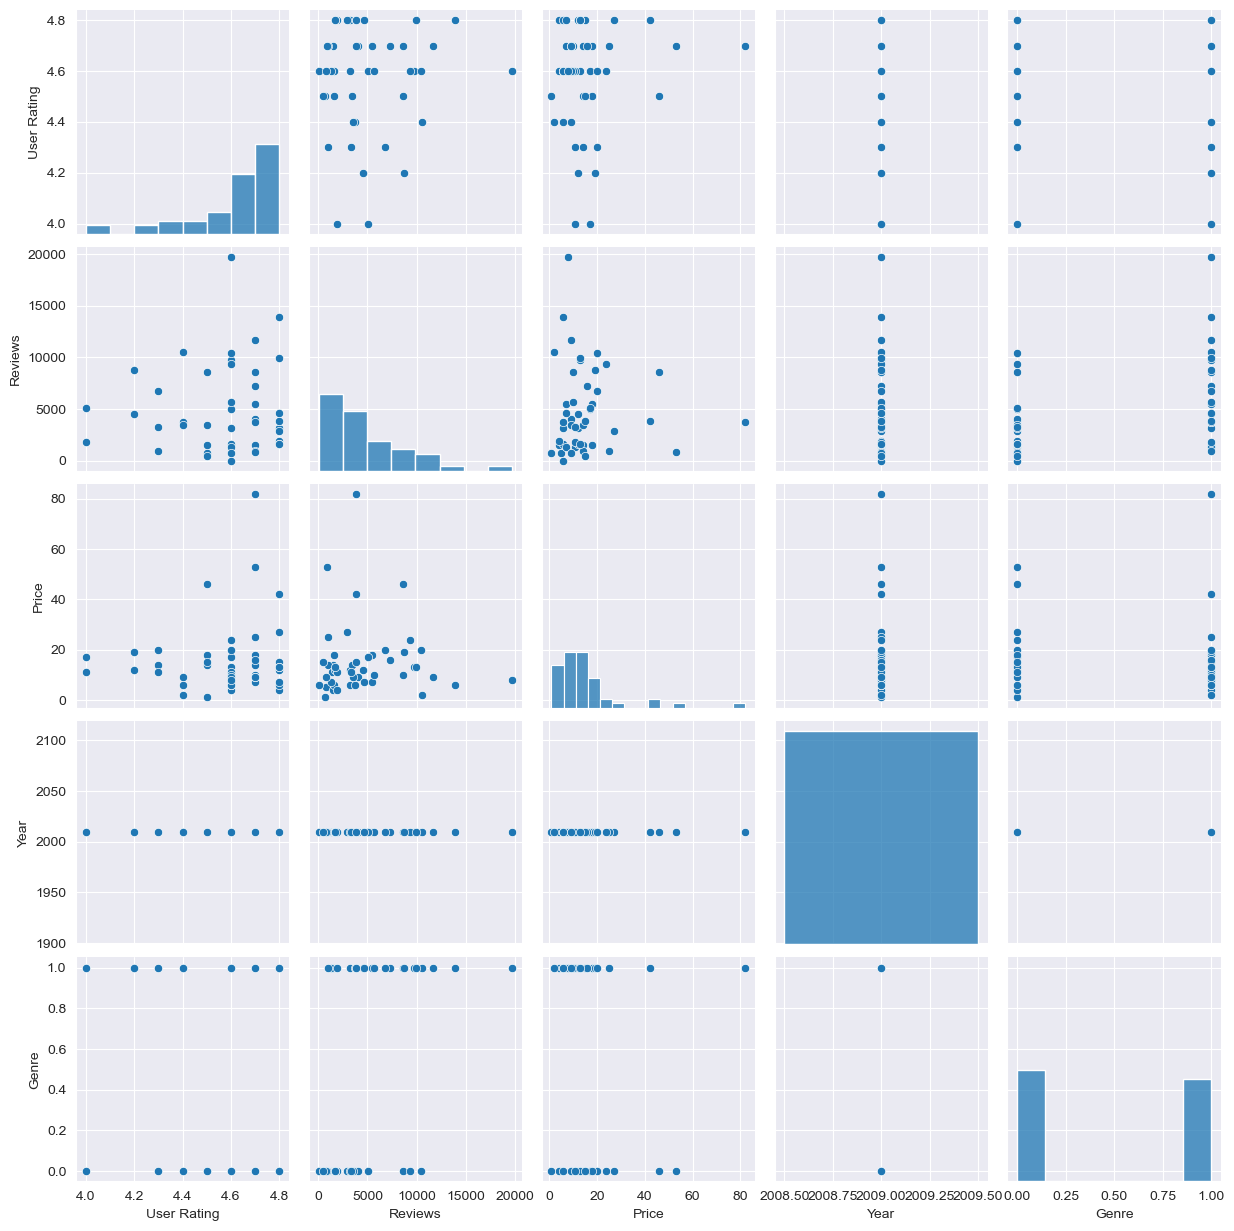

In [75]:
cols = ['User Rating', 'Reviews', 'Price', 'Year', 'Genre']
df_2009 = df[df['Year'] == 2009]
sns_plot = sns.pairplot(df_2009[cols])

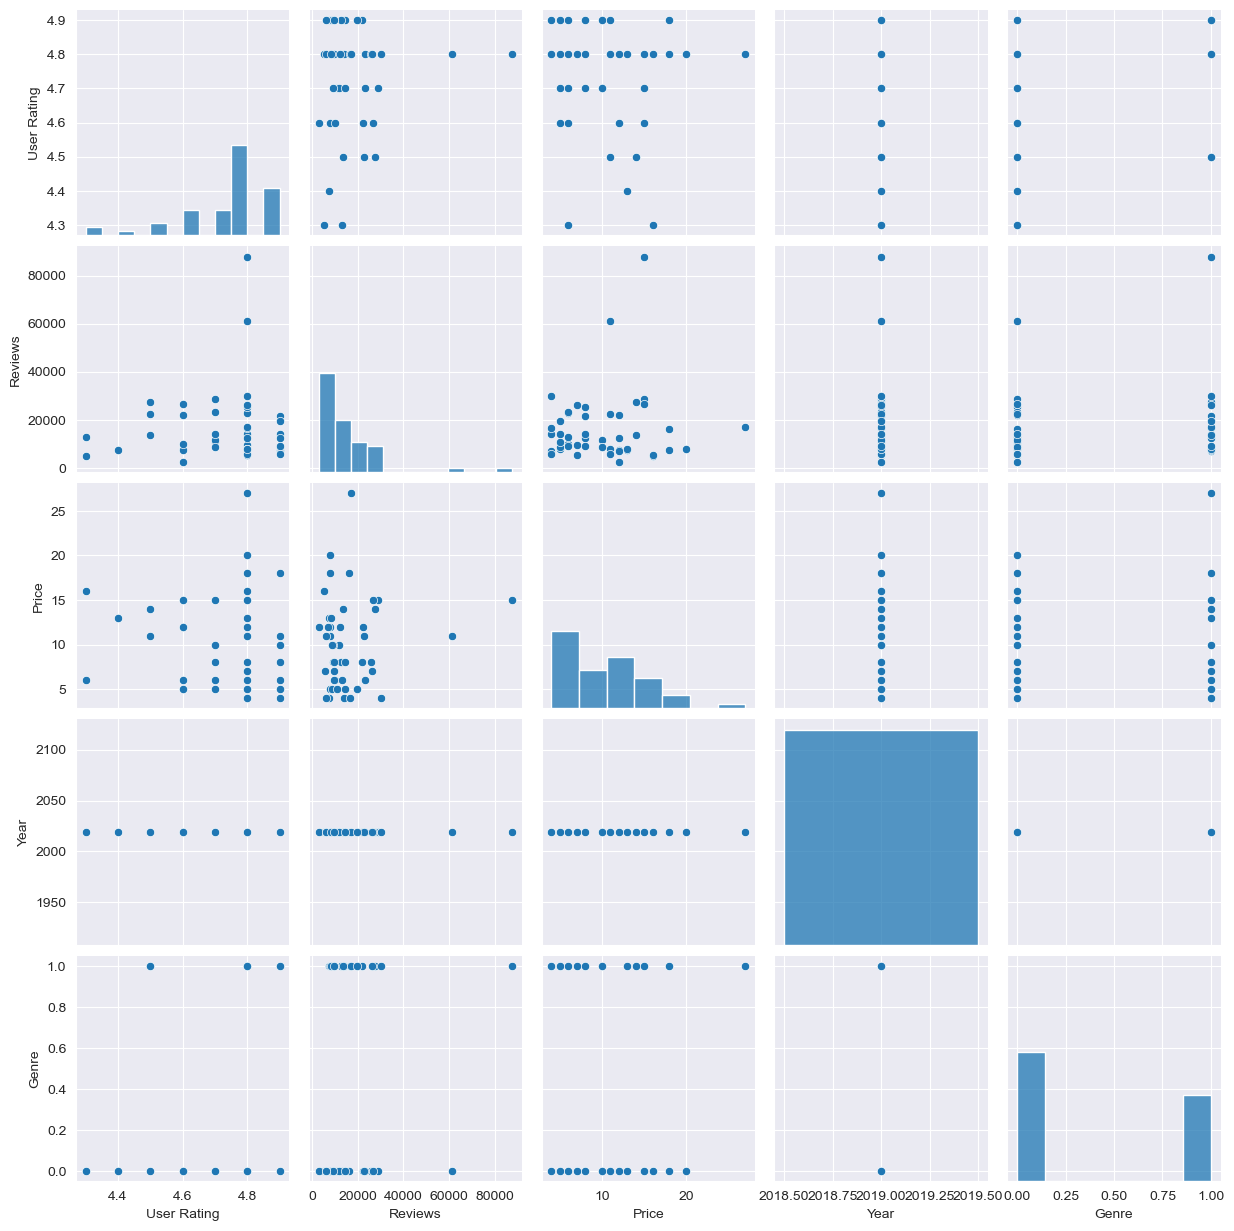

In [76]:
cols = ['User Rating', 'Reviews', 'Price', 'Year', 'Genre']
df_2019 = df[df['Year'] == 2019]
sns_plot = sns.pairplot(df_2019[cols])

<Axes: xlabel='Genre', ylabel='Year'>

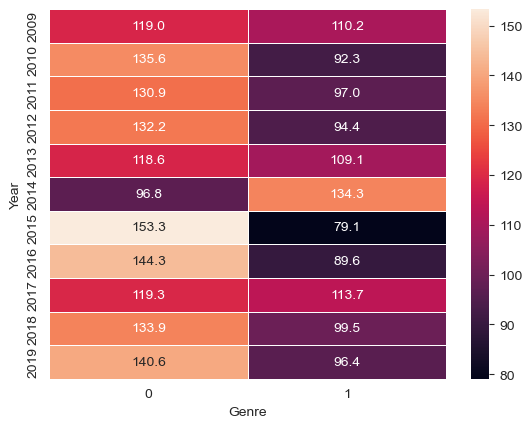

In [77]:
platform_genre_sales = df.pivot_table(
                            index = 'Year',
                            columns = 'Genre',
                            values = 'User Rating',
                            aggfunc = sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidth = .5)

<Axes: xlabel='Genre', ylabel='Year'>

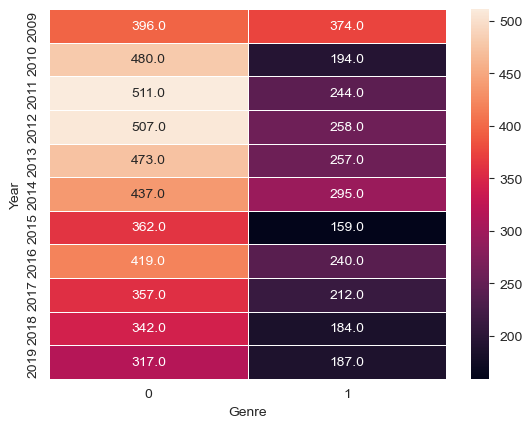

In [78]:
platform_genre_sales = df.pivot_table(
                            index = 'Year',
                            columns = 'Genre',
                            values = 'Price',
                            aggfunc = sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidth = .5)

<Axes: xlabel='Genre', ylabel='Year'>

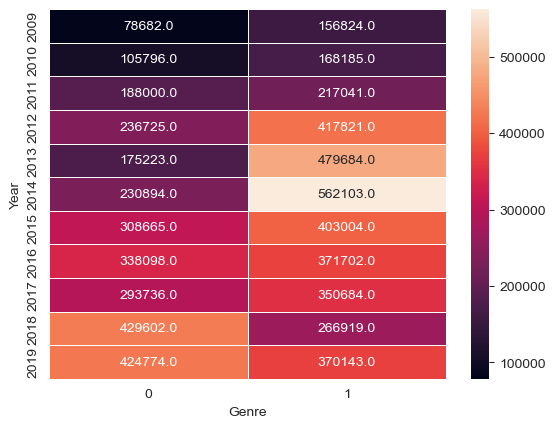

In [79]:
platform_genre_sales = df.pivot_table(
                            index = 'Year',
                            columns = 'Genre',
                            values = 'Reviews',
                            aggfunc = sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidth = .5)

In [80]:
df['Reviews'].corr(df['Price'])

-0.10918188342780515

<h1>Линейная регрессия<h1>

_Проверяем гипотезу: "Чем меньше цена на книги, тем больше на нее обзоров"_

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [257]:
df_years = df[df['Year'] == 2019]

dam_genre = pd.get_dummies(df['Genre'])
pd.concat([dam_genre, df], axis=1)


,0,1,Name,Author,User Rating,Reviews,Price,Year,Genre
0,1,0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,0
1,0,1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,1
2,1,0,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,0
3,0,1,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,1
4,1,0,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,0
...,...,...,...,...,...,...,...,...,...
545,0,1,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,1
546,1,0,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,0
547,1,0,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,0
548,1,0,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,0


In [258]:
X = df_years[['User Rating','Reviews','Genre']]
y = df_years['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

#2011 ok
#2019 ok
#В эти года чуутть-чуть есть корреляция
#В остальные года нет никакой зависимости с ценой


In [259]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [260]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 18.52855639508919
slope: [-1.87097407e+00  3.17140053e-05 -1.26865116e-02]


In [261]:
y_pred = model.predict(X_test)
y_pred

array([10.82720986, 10.53082725,  9.81545099,  9.98039554,  9.79531351,
       10.65056411, 10.10127501, 10.18947166, 10.9697634 ,  9.63634552,
        9.64563772,  9.64662085, 10.17436057])

In [262]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 19.790192719342194
R-squared: 0.06681289911583965


In [263]:
y_train

4      12
138     6
150     7
33     11
329     8
239    16
240    11
130    12
85      8
529    13
44     18
155    18
534    15
98     15
267    27
252     8
345    12
491     4
356     6
176     7
475    10
482     5
41      5
522     4
84      4
489    10
509     7
466    15
397    14
294     6
521    11
263     5
436    12
179     4
186    12
128    12
380     6
Name: Price, dtype: int64